<a href="https://colab.research.google.com/github/coulibalymoumouni/Python_seance/blob/main/TP_Rappel_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Etape 1 : Chargement des données
#importer la bibliothèque pandas pour manipuler les données
import pandas as pd
#charger les données
datamall = pd.read_csv('/content/123_Mall_Customers.csv')
#afficher quelques données aléatoirement
datamall.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
60,61,Male,70,46,56
157,158,Female,30,78,78
74,75,Male,59,54,47
24,25,Female,54,28,14
152,153,Female,44,78,20


In [17]:
#afficher les informations sur les variables
datamall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
#afficher les statistiques descriptives
datamall.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [19]:
#Etape 2 : Preprocessing (valeurs manquantes et normalisation)
#verifier les valeurs manquantes
datamall.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [20]:
# Suppression de la colonne "CustomerID" qui n'est pas pertinente
datamall.drop('CustomerID', axis=1, inplace=True)

In [22]:
## Encodage de la variable catégorielle "Genre"
datamall['Gender'] = datamall['Gender'].map({'Male': 1, 'Female': 0})

In [27]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datamall_X = scaler.fit_transform(datamall)

In [28]:
#Etape 3 : Modelisation Kmeans avec 4 clusters
#créer un modele KMeans
from sklearn.cluster import KMeans
modelKM = KMeans(n_clusters=4, random_state=42)
modelKM.fit(datamall_X)

KMeans(n_clusters=4, random_state=42)

In [29]:
#Etape 4 : Recuperation des clusters
#Récupérer les numéros des clusters dans un vecteur : y_kmean
y_kmeans = modelKM.labels_
print(y_kmeans)

[2 2 3 3 3 3 0 3 0 3 0 3 0 3 0 2 3 2 0 3 2 2 0 2 0 2 0 2 0 3 0 3 0 2 0 3 0
 3 0 3 0 2 0 3 0 3 0 3 3 3 0 2 3 0 0 0 0 0 3 0 0 2 0 0 0 2 3 0 2 3 0 0 0 0
 0 2 3 2 3 0 0 2 0 0 3 0 0 3 3 0 0 2 0 3 3 2 0 3 0 2 3 0 0 2 0 3 0 0 0 0 0
 3 3 2 3 3 0 0 0 0 2 3 3 2 3 3 1 2 1 2 1 2 3 3 1 3 1 2 1 3 1 2 3 3 1 2 1 3
 1 2 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 2 1 2 1 2 1 3 1 2 1 2 1 3 1 3 1
 2 1 2 1 3 1 3 1 3 1 3 1 2 1 2]


In [30]:
#Etape 5: Récuperation des centres des clusters
#Récupérer les centres des clusters
centers = modelKM.cluster_centers_
print(centers)

[[-0.01343038  1.13750203 -0.5213944  -0.39856802]
 [ 0.29862851  0.17329545  1.06645385 -1.2980103 ]
 [ 1.12815215 -0.72911539  0.01315937  0.77791013]
 [-0.88640526 -0.67998938 -0.08638219  0.55272197]]


/tmp/ipython-input-33-2845696781.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


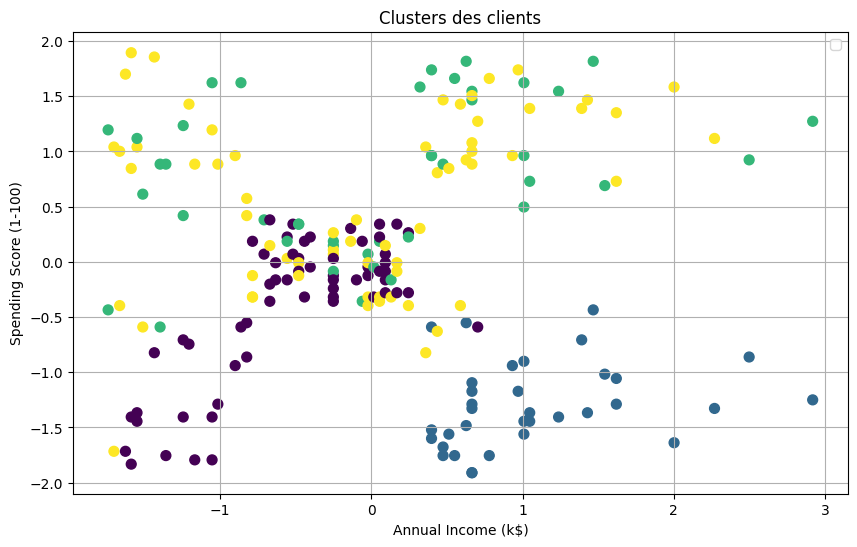

In [33]:
#Etape 6 : Visualisation des clusters
#Visualiser les clusters avec plt.scatter en affichant 2 variables significatives
#Annual Income et Spending Score
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(datamall_X[:, 2], datamall_X[:, 3], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters des clients avec k=4')
plt.legend()
plt.grid(True)
plt.show()


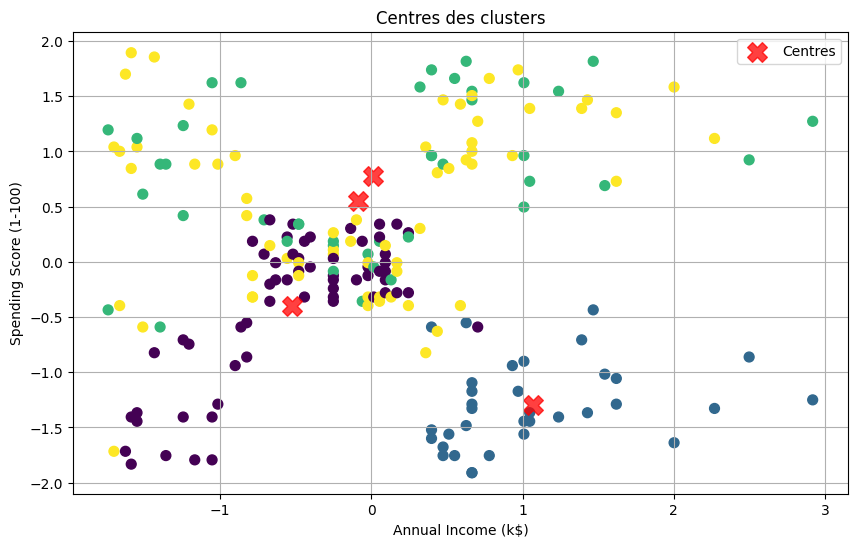

In [34]:
#Etape 7 : Visualisation des clusters avec leurs centres
plt.figure(figsize=(10, 6))
plt.scatter(datamall_X[:, 2], datamall_X[:, 3], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centres')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Centres des clusters')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
#Etape 8: Indice de silhouette et choix optimal de k
#8.a Charger les librairies nécessaires pour utiliser l’indice de silhouette
from sklearn.metrics import silhouette_score
#8.b Calculer l’indice de silhouette pour k=4
score = silhouette_score(datamall_X, y_kmeans)
print("Indice de silhouette pour k=4:", score)

Indice de silhouette : 0.29010917402310876


In [39]:
#8.c Tracer la courbe de silhouette_score pour plusieurs K nbre de clusters et trouver la
#meilleure valeur de k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(datamall_X)
    score = silhouette_score(datamall_X, kmeans.labels_)
    scores.append(score)

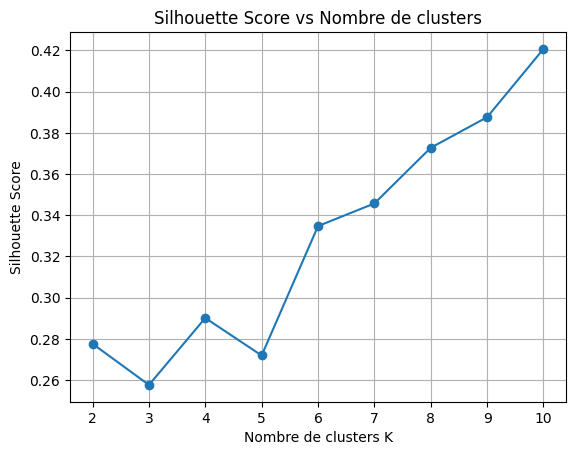

In [40]:
# Tracer la courbe
plt.plot(K_range, scores, marker='o')
plt.title("Silhouette Score vs Nombre de clusters")
plt.xlabel("Nombre de clusters K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
#Autres méthodes : Méthode du coude (Elbow Method)
#pour déterminer le meilleur nombre de clusters k

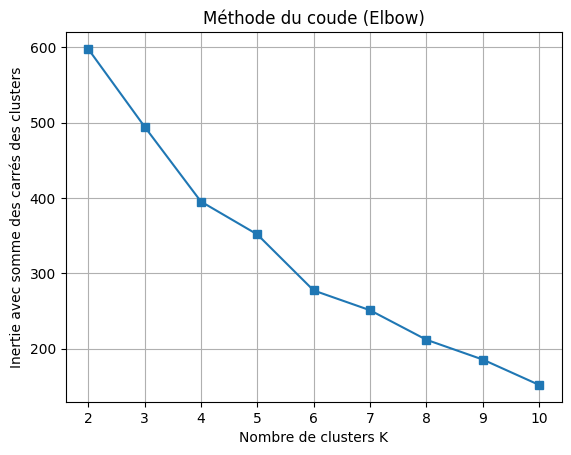

In [41]:
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(datamall_X)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='s')
plt.title("Méthode du coude (Elbow)")
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie avec somme des carrés des clusters")
plt.grid(True)
plt.show()